In [1]:
import pandas as pd
import numpy as np
import dask

In [2]:
#test_data_dir = './test_data/J074000_25_31_03_2019_bdt.txt'

In [3]:
#test_data_df = pd.read_csv(test_data_dir)

In [5]:
from dask.delayed import delayed

In [6]:
from math import sqrt

In [7]:
def f(z):
    return sqrt(z+4)

In [8]:
def g(y):
    return y-3

In [9]:
def h(x):
    return x**2

In [10]:
x=4

In [11]:
y = delayed(h)(x)
z = delayed(g)(y)
w = delayed(f)(z)

In [12]:
type(w)

dask.delayed.Delayed

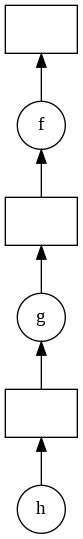

In [14]:
w.visualize()